In [1]:
!pip install -U scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [3]:
# Define linguistic variables and fuzzy sets for input variables
data_redundancy = ctrl.Antecedent(np.arange(0, 101, 1), 'data_redundancy')
degradation_level = ctrl.Antecedent(np.arange(0, 101, 1), 'degradation_level')
error_history = ctrl.Antecedent(np.arange(0, 101, 1), 'error_history')
# Define linguistic variable and fuzzy sets for output variable
error_likelihood = ctrl.Consequent(np.arange(0, 101, 1), 'error_likelihood')

# Define fuzzy sets for each linguistic variable
data_redundancy['Low'] = fuzz.trimf(data_redundancy.universe, [0, 0, 50])
data_redundancy['Medium'] = fuzz.trimf(data_redundancy.universe, [0, 50, 100])
data_redundancy['High'] = fuzz.trimf(data_redundancy.universe, [50, 100, 100])

degradation_level['Low'] = fuzz.trimf(degradation_level.universe, [0, 0, 50])
degradation_level['Medium'] = fuzz.trimf(degradation_level.universe, [0, 50, 100])
degradation_level['High'] = fuzz.trimf(degradation_level.universe, [50, 100, 100])

error_history['Low'] = fuzz.trimf(error_history.universe, [0, 0, 50])
error_history['Medium'] = fuzz.trimf(error_history.universe, [0, 50, 100])
error_history['High'] = fuzz.trimf(error_history.universe, [50, 100, 100])


# Custom membership functions for error likelihood
error_likelihood['Low'] = fuzz.trimf(error_likelihood.universe, [0, 0, 50])
error_likelihood['Medium'] = fuzz.trimf(error_likelihood.universe, [0, 50, 100])
error_likelihood['High'] = fuzz.trimf(error_likelihood.universe, [50, 100, 100])

C:\Users\User\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


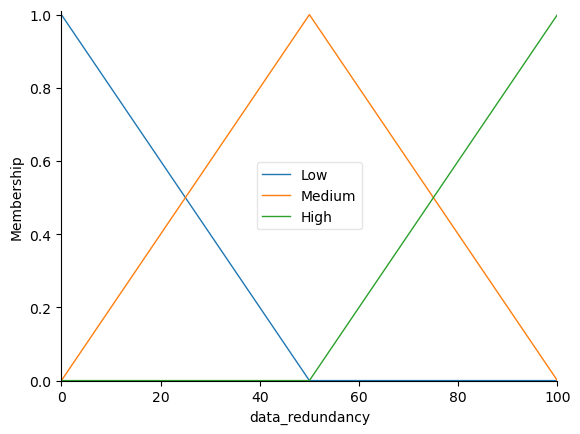

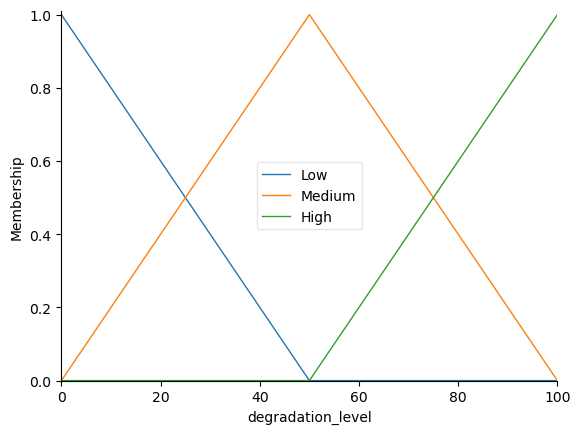

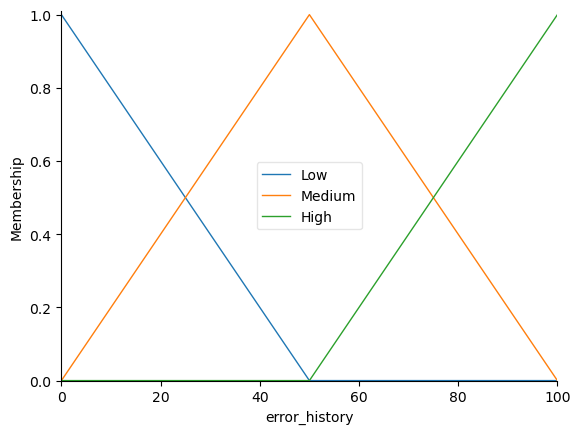

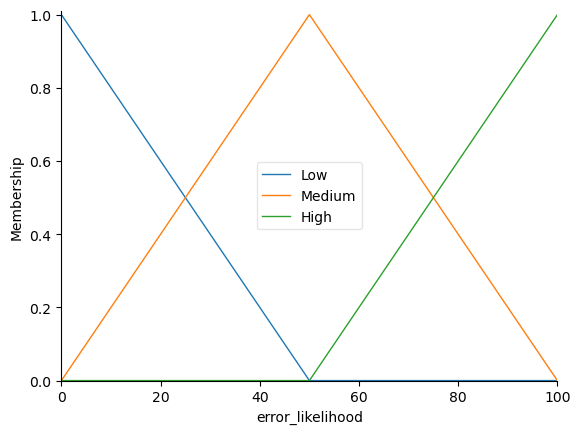

In [4]:
# Visualize membership functions
data_redundancy.view()
degradation_level.view()
error_history.view()

# Visualize membership functions for consequent
error_likelihood.view()

# Display the plots
plt.show()

In [5]:
# Additional Rules
rule_one = ctrl.Rule(data_redundancy['Low'] & degradation_level['Low'] & error_history['Low'], error_likelihood['Low'])
rule_two = ctrl.Rule(data_redundancy['High'] & degradation_level['High'] & error_history['High'], error_likelihood['High'])
rule_three = ctrl.Rule(data_redundancy['Medium'] & degradation_level['Medium'] & error_history['Medium'], error_likelihood['Medium'])
rule_four = ctrl.Rule(data_redundancy['Low'] & degradation_level['High'] & error_history['Medium'], error_likelihood['High'])
rule_five = ctrl.Rule(data_redundancy['High'] & degradation_level['Medium'] & error_history['High'], error_likelihood['High'])
rule_six = ctrl.Rule(data_redundancy['Medium'] & degradation_level['High'] & error_history['Low'], error_likelihood['Medium'])
rule_seven = ctrl.Rule(data_redundancy['Low'] & degradation_level['Medium'] & error_history['Low'], error_likelihood['Low'])
rule_eight = ctrl.Rule(data_redundancy['High'] & degradation_level['Low'] & error_history['Medium'], error_likelihood['High'])
rule_nine = ctrl.Rule(data_redundancy['Low'] & degradation_level['Low'] & error_history['High'], error_likelihood['Medium'])
rule_ten = ctrl.Rule(data_redundancy['Medium'] & degradation_level['Low'] & error_history['High'], error_likelihood['Medium'])


In [6]:
# Create the control system
error_ctrl = ctrl.ControlSystem([rule_one,rule_two,rule_three,rule_four,rule_five,rule_six,rule_seven,rule_eight,rule_nine,rule_ten])

# Create the simulation
error_simulation = ctrl.ControlSystemSimulation(error_ctrl)

# Pass inputs to the ControlSystemSimulation 

error_simulation.input['data_redundancy'] = 70   # change this values as user inputs
error_simulation.input['degradation_level'] = 70   # change this values as user inputs
error_simulation.input['error_history'] = 70     # change this values as user inputs

53.76811594202898


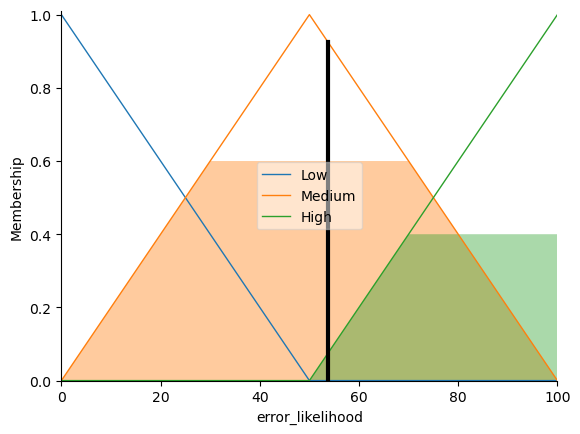

In [7]:
# Crunch the numbers
error_simulation.compute()

# Output result
print(error_simulation.output['error_likelihood'])

# Visualize the output
error_likelihood.view(sim=error_simulation)

Initiating Error Detection and Correction...


Enter Data Redundancy (0-100):  10
Enter Degradation Level (0-100):  25
Enter Error History (0-100):  15


Error Likelihood: 37.028985507246425
Low Error
Error Correction Strategies:


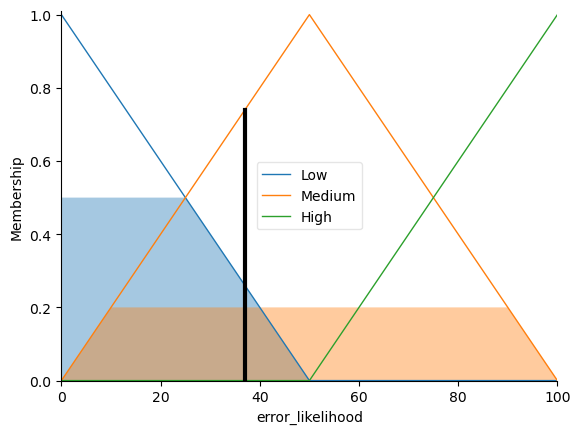

In [9]:
def get_user_input():
    data_redundancy_input = float(input("Enter Data Redundancy (0-100): "))
    degradation_level_input = float(input("Enter Degradation Level (0-100): "))
    error_history_input = float(input("Enter Error History (0-100): "))
    return data_redundancy_input, degradation_level_input, error_history_input

def compute_error_likelihood(data_redundancy, degradation_level, error_history):
    error_simulation.input['data_redundancy'] = data_redundancy
    error_simulation.input['degradation_level'] = degradation_level
    error_simulation.input['error_history'] = error_history
    error_simulation.compute()
    return error_simulation.output['error_likelihood']

def print_error_correction_strategies(error_likelihood):
    if 0 <= error_likelihood <= 40:
        print("Low Error")
        print("Error Correction Strategies:")
        # (low error correction strategies)
    elif 35 < error_likelihood <= 65:
        print("Medium Error")
        print("Error Correction Strategies:")
        # (medium error correction strategies)
    elif 65 < error_likelihood <= 100:
        print("High Error")
        print("Error Correction Strategies:")
        # (high error correction strategies)
    else:
        print("Invalid error likelihood output")

def visualize_output():
    error_likelihood.view(sim=error_simulation)
    plt.show()

def error_detection_correction():
    print("Initiating Error Detection and Correction...")

    # Get user input
    data_redundancy, degradation_level, error_history = get_user_input()

    # Compute error likelihood
    calculated_error_likelihood = compute_error_likelihood(data_redundancy, degradation_level, error_history)

    # Display the result
    print("Error Likelihood:", calculated_error_likelihood)

    # Print error correction strategies
    print_error_correction_strategies(calculated_error_likelihood)

    # Visualize the output
    visualize_output()

# Call the function to test
error_detection_correction()
